## Question 5B
Take a binary image and a structuring element to perform `Opening` and `Closing` operations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv

In [2]:
def erosion(image, mask):
    considered_pixel = mask.copy()
    new_image = image.copy()
    mask_x, mask_y = mask.shape
    height, width = image.shape

    for i in range(height):
        for j in range(width):
            flag = True
            for l in range(mask_y):
                for r in range(mask_x):
                    if mask[l, r] == 0:
                        continue

                    xx = l + i - (mask_x//2)
                    yy = r + j - (mask_y//2)
                    considered_pixel[l, r] = 0

                    if (xx>=0 and xx<height and yy>=0 and yy<width):
                        considered_pixel[l, r] = image[xx, yy]
                    
                    if considered_pixel[l, r] == 0:
                        flag = False
                        break
                
                if flag == True:
                    new_image[i, j] = 255
                else:
                    new_image[i, j] = 0

    return new_image.astype(np.uint8)

In [3]:
def dilation(image, mask):
    considered_pixel = mask.copy()
    new_image = np.zeros(image.shape, dtype=np.uint8)
    mask_x, mask_y = mask.shape
    height, width = image.shape
    for i in range(height):
        for j in range(width):
            flag = False
            for l in range(mask_x):
                for r in range(mask_y):
                    xx = l + i - (mask_x//2)
                    yy = r + j - (mask_y//2)
                    if (xx<0 or xx>=height or yy<0 or yy>=width):
                        continue
                    if image[xx, yy] > 0:
                        flag = True
                        break 
            
            if flag:
                new_image[i, j] = 255
            flag = False
    
    return new_image.astype(np.uint8)

### Opening Function

In [4]:
def opening(image, mask):
    erotedImage = erosion(image, mask)
    dilationImage = dilation(erotedImage, mask)
    return dilationImage

### Closing Function

In [5]:
def closing(image, mask):
    dilatedImage = dilation(image, mask)
    erotedImage = erosion(dilatedImage, mask)
    return erotedImage

In [20]:
original_image = cv.imread("region.tif", cv.IMREAD_GRAYSCALE)
mask = np.ones((15,15), dtype=np.uint8)
open_image = opening(original_image, mask)
close_image = closing(original_image, mask)

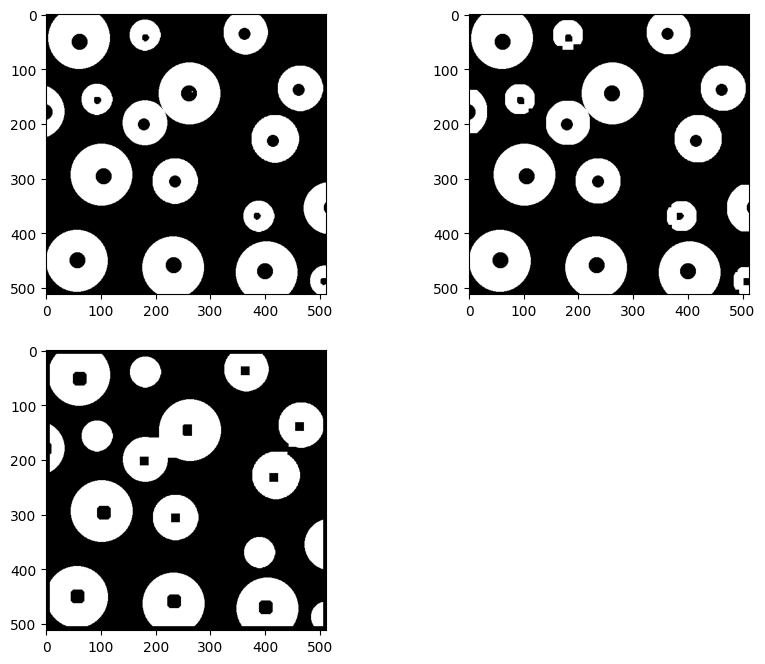

In [21]:
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.imshow(original_image, cmap="gray")

plt.subplot(222)
plt.imshow(open_image, cmap="gray")

plt.subplot(223)
plt.imshow(close_image, cmap="gray")